In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('BTCCash.csv', index_col = 0, skiprows=0)
df=df.reset_index()
print(df.shape)
df.head(10)

(76, 8)


,Date,Price,Open,High,Low,Vol.,Change %,Date_m
0,08-12-17,1385.0,1231.0,1564.9,1125.2,119.26K,12.69,43077
1,09-12-17,1364.8,1385.0,1475.6,1300.1,49.34K,-1.46,43078
2,10-12-17,1288.3,1364.8,1369.1,1180.2,48.11K,-5.61,43079
3,11-12-17,1408.4,1288.3,1435.5,1255.2,40.71K,9.32,43080
4,12-12-17,1581.8,1408.4,1626.0,1250.0,64.27K,12.31,43081
5,13-12-17,1581.1,1581.8,1695.3,1447.6,83.18K,-0.04,43082
6,14-12-17,1936.7,1581.1,2100.0,1565.0,168.20K,22.49,43083
7,15-12-17,1799.6,1936.7,1944.9,1623.3,76.06K,-7.08,43084
8,16-12-17,1774.8,1799.6,1868.0,1730.1,41.56K,-1.38,43085
9,17-12-17,1829.2,1774.8,1910.0,1766.7,38.12K,3.07,43086


In [3]:
df=df.drop("Date",axis=1,inplace=False);
df=df.drop("Vol.",axis=1,inplace=False);
df=df.drop("Change %",axis=1,inplace=False);
df=df.drop("Low",axis=1,inplace=False);
df=df.drop("High",axis=1,inplace=False);
df=df.drop("Open",axis=1,inplace=False);
y =  df["Price"]
X = df.drop(["Price"],axis=1,inplace=False)
df.head(10)

,Price,Date_m
0,1385.0,43077
1,1364.8,43078
2,1288.3,43079
3,1408.4,43080
4,1581.8,43081
5,1581.1,43082
6,1936.7,43083
7,1799.6,43084
8,1774.8,43085
9,1829.2,43086


In [4]:
import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("pred set shape: %s" %(y_pred.shape[0]) )
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))



C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


train set shape: 53, 53
test set shape: 23, 53
pred set shape: 23
mse = 220473.76016668405, rmse = 469.5463344193883 
mae = 348.69886728491736 r2 = -0.10478096703910666


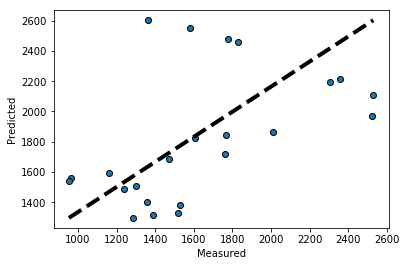

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [6]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
df.head(10)

,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


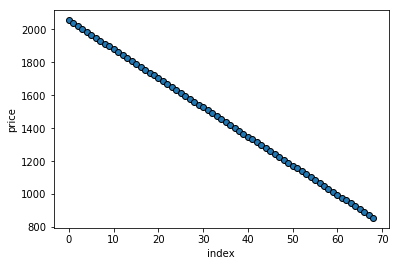

In [7]:
X_test = df
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test.index,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('index')
ax.set_ylabel('price')
plt.show()


In [8]:

import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=123)


print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)

train set shape: 76, 76
test set shape: 0, 76


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

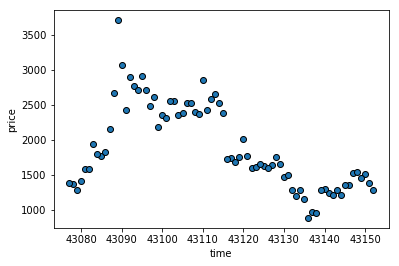

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train,y_train, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()


In [10]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
X_test = df

X_test.head(10)


,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


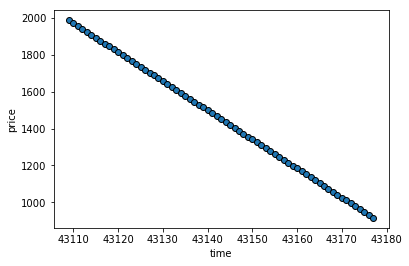

In [11]:
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()

prediction = pd.DataFrame(X_test,y_pred).to_csv('prediction_BTCcash.csv')
